# D209 - Task 1 - Classification Analysis (with K-Nearest Neighbors)


---

## Part I: Research Question


### 1.  Propose one question relevant to a real-world organizational situation that you will answer.

We are using a Churn dataset that contains customer information for a telecom company.  In addition to descriptive information, it holds a column for Churn - notating whether or not the customer left for another provider.  What features describe a customer that is likely to leave, and can we determine if someone is likely to leave?  These are the questions we hope to answer this this analysis.



### 2.  Define one goal of the data analysis.

If we can determine which customers are likely to leave, we can work to keep their business.  It is commonly found that aquiring new customers is very costly, so it will be benificial if our company can keep they customers we already have.  This would save losses and improve our over all financial state, as well as help craft a good image because of the customer loyalty.



---

## Part II: Method Justification


### 1.  Explain how the classification method you chose analyzes the selected data set. Include expected outcomes.

K-Nearnest Neighbors (also known as KNN) will be the classification method utilized.  It determines the classification by looking at the closest known points and using the majority classification for the unknown point.  The number of points considered is defined by K.  For example, if the three closest points have a classification of 2 'A's and 1 'B', the unknown point would be classified as 'A' (the majority at 67%).

The expected outcome is the ability to determine Churn as a Yes/No, True/False based on the most similar known datapoints.  It will take some tuning to arrive at the final model.



### 2.  Summarize one assumption of the chosen classification method.

One primary assumption of KNN is that similar items exist in close proximity (Harrison, 2019).  This proximity can be measured in various ways (straight line is the most popular).  This assumption is what allows us to based the classification on the nearest neighbors. 



### 3.  List the packages or libraries you have chosen for Python.

We will use Python for the analysis because it is a full functioned language that can be used in standard software development as well.  This makes it well suited for developer that has used other languages before.  It also has a relatively easy to read (and learn) syntax.

We will use the following packages for Python:
 - Numpy (useful math functions and series/list manipulation)
 - Pandas (extremely helpful in storing and manipulating dataframe, including loading and saving CSVs)
 - Matplotlib (for graphical representations)
 - Seaborn (an additional graphical library that provides more developed asthetics)
 - SciKit Learn (an extensive library of data science models and helpful methods)
  - MinMaxScaler (to normalize the data)
  - KNeighborsClassifier (the specific portion that creates a KNN model)
  - train_test_split (allows us to split the dataset for testing)
  - confusion_matrix (to determine a confusion matrix)
  - GridSearchCV (allows the further splitting of data to run the model on different subsets, as well as running through an array of different parameter options to determine the best hyperparameters)



---

## Part III: Data Preparation


### 1.  Describe one data preprocessing goal relevant to the classification method.

We will begin by removing columns that are not relevant to this analysis.  Then we will check the data for null or otherwise "blank" values.  If any are found, we will have to decide if the records should be removed or if the values should be approximated using the mean or a similar method.  Empty values could throw off the model and leave us with results that are not trustworthy.



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns when reviewing
pd.options.display.max_columns = None

# Load the dataset
df = pd.read_csv('churn_clean.csv')
# Review the column names
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [2]:
# Based on the data dictionary, these columns are ids or otherwise irrelevant for models
df.drop(columns=['CaseOrder','Customer_id','Interaction','UID'], inplace=True)

# The location fields can all be represented by the lat long
df.drop(columns=['City','State','County','Zip','TimeZone'], inplace=True)

# Other columns that have too many options to track or are otherwise unusable
df.drop(columns='Job', inplace=True)

In [3]:
# Inspect the datatypes and null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Area                  10000 non-null  object 
 4   Children              10000 non-null  int64  
 5   Age                   10000 non-null  int64  
 6   Income                10000 non-null  float64
 7   Marital               10000 non-null  object 
 8   Gender                10000 non-null  object 
 9   Churn                 10000 non-null  object 
 10  Outage_sec_perweek    10000 non-null  float64
 11  Email                 10000 non-null  int64  
 12  Contacts              10000 non-null  int64  
 13  Yearly_equip_failure  10000 non-null  int64  
 14  Techie                10000 non-null  object 
 15  Contract            

In [4]:
# Grab a sample of the data to make sure we don't spot blanks
df.sample(10)

,Lat,Lng,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1561,41.56878,-92.87127,1426,Rural,3,44,87367.88,Widowed,Male,Yes,6.172326,17,0,0,No,Month-to-month,No,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Mailed Check,9.300518,257.651257,2113.787891,2,3,3,4,1,4,5,2
1437,40.09495,-91.90277,1234,Suburban,0,35,23781.26,Divorced,Female,No,6.476263,16,0,1,No,Two Year,Yes,No,DSL,No,No,No,No,No,No,No,Yes,Yes,Mailed Check,16.483771,127.442069,1968.581014,3,3,4,2,3,4,3,2
3196,45.88269,-108.50580,31560,Suburban,3,20,7657.12,Married,Female,No,10.247910,12,0,0,No,Month-to-month,No,No,Fiber Optic,No,No,Yes,Yes,No,Yes,No,No,Yes,Electronic Check,3.052755,149.977800,609.948221,4,4,5,5,2,3,4,3
9201,33.79572,-118.11640,41026,Urban,0,30,57145.52,Widowed,Female,No,10.273950,15,0,0,No,Month-to-month,Yes,No,DSL,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Electronic Check,71.484760,152.457900,6706.905363,2,4,3,4,4,3,3,3
2076,34.85274,-96.10644,1111,Rural,5,67,48112.75,Married,Female,No,13.102020,11,2,0,No,Month-to-month,Yes,Yes,None,Yes,No,No,No,Yes,No,No,No,No,Bank Transfer(automatic),7.978289,92.501800,832.638565,4,4,5,4,3,4,4,3
7166,36.47023,-119.10550,9755,Rural,1,87,46680.14,Divorced,Female,No,8.064148,10,1,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,Yes,No,Mailed Check,60.359770,190.127000,5796.781424,4,5,5,4,3,4,4,4
1618,35.02554,-81.39883,861,Urban,3,51,16425.42,Separated,Male,No,5.552132,12,0,0,Yes,Two Year,No,No,DSL,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Credit Card (automatic),11.808010,152.510442,1784.584135,3,3,4,3,4,1,3,3
6657,36.05561,-86.97340,40425,Suburban,2,37,12271.73,Separated,Female,No,6.464551,13,1,1,No,Month-to-month,Yes,Yes,Fiber Optic,Yes,No,No,Yes,No,No,No,No,Yes,Electronic Check,48.265440,134.950900,4148.530189,2,3,4,2,3,5,3,3
8618,32.95132,-88.24098,171,Suburban,3,41,86921.80,Separated,Female,No,11.991230,20,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,No,No,Yes,Yes,No,No,Yes,Yes,Mailed Check,48.710740,182.460800,4447.513551,6,5,4,5,4,5,6,6
6934,37.35571,-76.30769,81,Suburban,0,22,65714.50,Widowed,Male,No,8.229441,9,1,0,No,One year,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,Yes,No,Bank Transfer(automatic),65.867390,152.455500,6309.069748,2,3,4,3,5,2,3,3


>There do not appear to be any missing values that we need to handle.

### 2.  Identify the initial data set variables that you will use to perform the analysis, and classify each variable as continuous or categorical.

Based on the sample above and the datatypes we can conclude that the variables are as follows -

|Variable|Cont/Cat|Type|
|---|---|---|
|Lat|Continuous|Independent|
|Lng|Continuous|Independent|
|Population|Continuous|Independent|
|Area|Categorical|Independent|
|Children|Continuous|Independent|
|Age|Continuous|Independent|
|Income|Continuous|Independent|
|Marital|Categorical|Independent|
|Gender|Categorical|Independent|
|Churn|Categorical|**Dependent**|
|Outage_sec_perweek|Continuous|Independent|
|Email|Continuous|Independent|
|Contacts|Continuous|Independent|
|Yearly_equip_failure|Continuous|Independent|
|Techie|Categorical|Independent|
|Contract|Categorical|Independent|
|Port_modem|Categorical|Independent|
|Tablet|Categorical|Independent|
|InternetService|Categorical|Independent|
|Phone|Categorical|Independent|
|Multiple|Categorical|Independent|
|OnlineSecurity|Categorical|Independent|
|OnlineBackup|Categorical|Independent|
|DeviceProtection|Categorical|Independent|
|TechSupport|Categorical|Independent|
|StreamingTV|Categorical|Independent|
|StreamingMovies|Categorical|Independent|
|PaperlessBilling|Categorical|Independent|
|PaymentMethod|Categorical|Independent|
|Tenure|Continuous|Independent|
|MontlyCharge|Continuous|Independent|
|Bandwidth_GB_Year|Continuous|Independent|
|Item1|Categorical|Independent|
|Item2|Categorical|Independent|
|Item3|Categorical|Independent|
|Item4|Categorical|Independent|
|Item5|Categorical|Independent|
|Item6|Categorical|Independent|
|Item7|Categorical|Independent|
|Item8|Categorical|Independent|



### 3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

We will perform the following steps to prepare for analysis -

1. Move the Target variable to the end so it can be easily split for the model inputs.
<br><br>
2. Create quantitive representations of all qualitive variables using the Pandas get_dummies function.  This will change the data into numeric representations that can be handled by the models.
<br><br>
3. Normalize the variables so they have equal impact on the model.
<br><br>
4. Split the data into the features and target.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Move the Target variable to the end
churn = df['Churn']
df.drop(columns='Churn', inplace=True)
df['Churn'] = churn

# Make all variables quantitive using get_dummies
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

# Normalize the variables
scaler = MinMaxScaler()
columns = df_dummies.columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_dummies))
df_scaled.columns = columns
df_scaled.head()

# Split into the target and predictor sets
X = df_scaled.iloc[:, :-1]
y = df_scaled['Churn_Yes']

### 4.  Provide a copy of the cleaned data set.


In [6]:
df_scaled.to_csv('D209 Task1 Prepped Data.csv')

---

## Part IV: Analysis


### 1.  Split the data into training and test data sets and provide the file(s).

In [7]:
from sklearn.model_selection import train_test_split as tts

# Create a training set of 80%, test split of 20%, stratify on the target
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state = 3131)

>We are stratifying on the target variable in order to make sure we leave plenty of examples of both Churn values in the train and test sets (Bhattacharyya, 2020).

### 2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

>Above I used head and sample functions to analysis.  We will now perform additional analysis.

In [8]:
# Browse the summary statistics for our features
df_scaled.describe()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Suburban,Area_Urban,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary,Techie_Yes,Contract_One year,Contract_Two Year,Port_modem_Yes,Tablet_Yes,InternetService_Fiber Optic,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn_Yes
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.394715,0.763114,0.087229,0.20877,0.494062,0.152612,0.469128,0.500727,0.142029,0.066333,0.472203,0.440790,0.462176,0.415133,0.417517,0.355286,0.416250,0.415483,0.356757,0.418250,0.356514,0.334600,0.332700,0.191100,0.195600,0.201400,0.202700,0.474400,0.023100,0.167900,0.210200,0.244200,0.483400,0.299100,0.440800,0.212900,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,0.208300,0.339800,0.22900,0.265000
std,0.103226,0.142955,0.129036,0.21472,0.291534,0.109069,0.140994,0.137541,0.141209,0.105992,0.372443,0.204314,0.312030,0.172966,0.172440,0.146854,0.170969,0.170803,0.147655,0.171417,0.146948,0.471874,0.471204,0.393187,0.396682,0.401066,0.402031,0.499369,0.150229,0.373796,0.407471,0.429633,0.499749,0.457887,0.496508,0.409378,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,0.406113,0.473665,0.42021,0.441355
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.329869,0.703689,0.006598,0.00000,0.239437,0.073007,0.375150,0.409091,0.000000,0.000000,0.097430,0.285469,0.154347,0.333333,0.333333,0.285714,0.333333,0.333333,0.285714,0.333333,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.406832,0.790126,0.026021,0.10000,0.492958,0.126945,0.469919,0.500000,0.142857,0.000000,0.484940,0.416335,0.446069,0.333333,0.500000,0.285714,0.333333,0.333333,0.285714,0.500000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,0.458301,0.863980,0.117729,0.30000,0.746479,0.204591,0.562347,0.590909,0.285714,0.166667,0.851836,0.574531,0.775420,0.500000,0.500000,0.428571,0.500000,0.500000,0.428571,0.500000,0.428571,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000
max,1.00000

The describe method let's us view summary statistics for all variables at once.  Below are some notes regarding the data.
<br>
- The standard deviation for Age is rather large (since this is capped between 0 and 1).  This would indicate a wide range of values in the data.
- The mean of a few values is very low, indicating low values overall in the dataset with a few outliers in the high range (closer to 1).
 - Population
 - Income
 - Contacts
 - Yearly_equip_failure
 - Gender_Nonbinary

Finally we will execute a pair plot on some key columns to look at distributions and possible correlations.  Running a pair plot on the full dataframe would take a long time to process and result in individual graphs that would be too small to read.

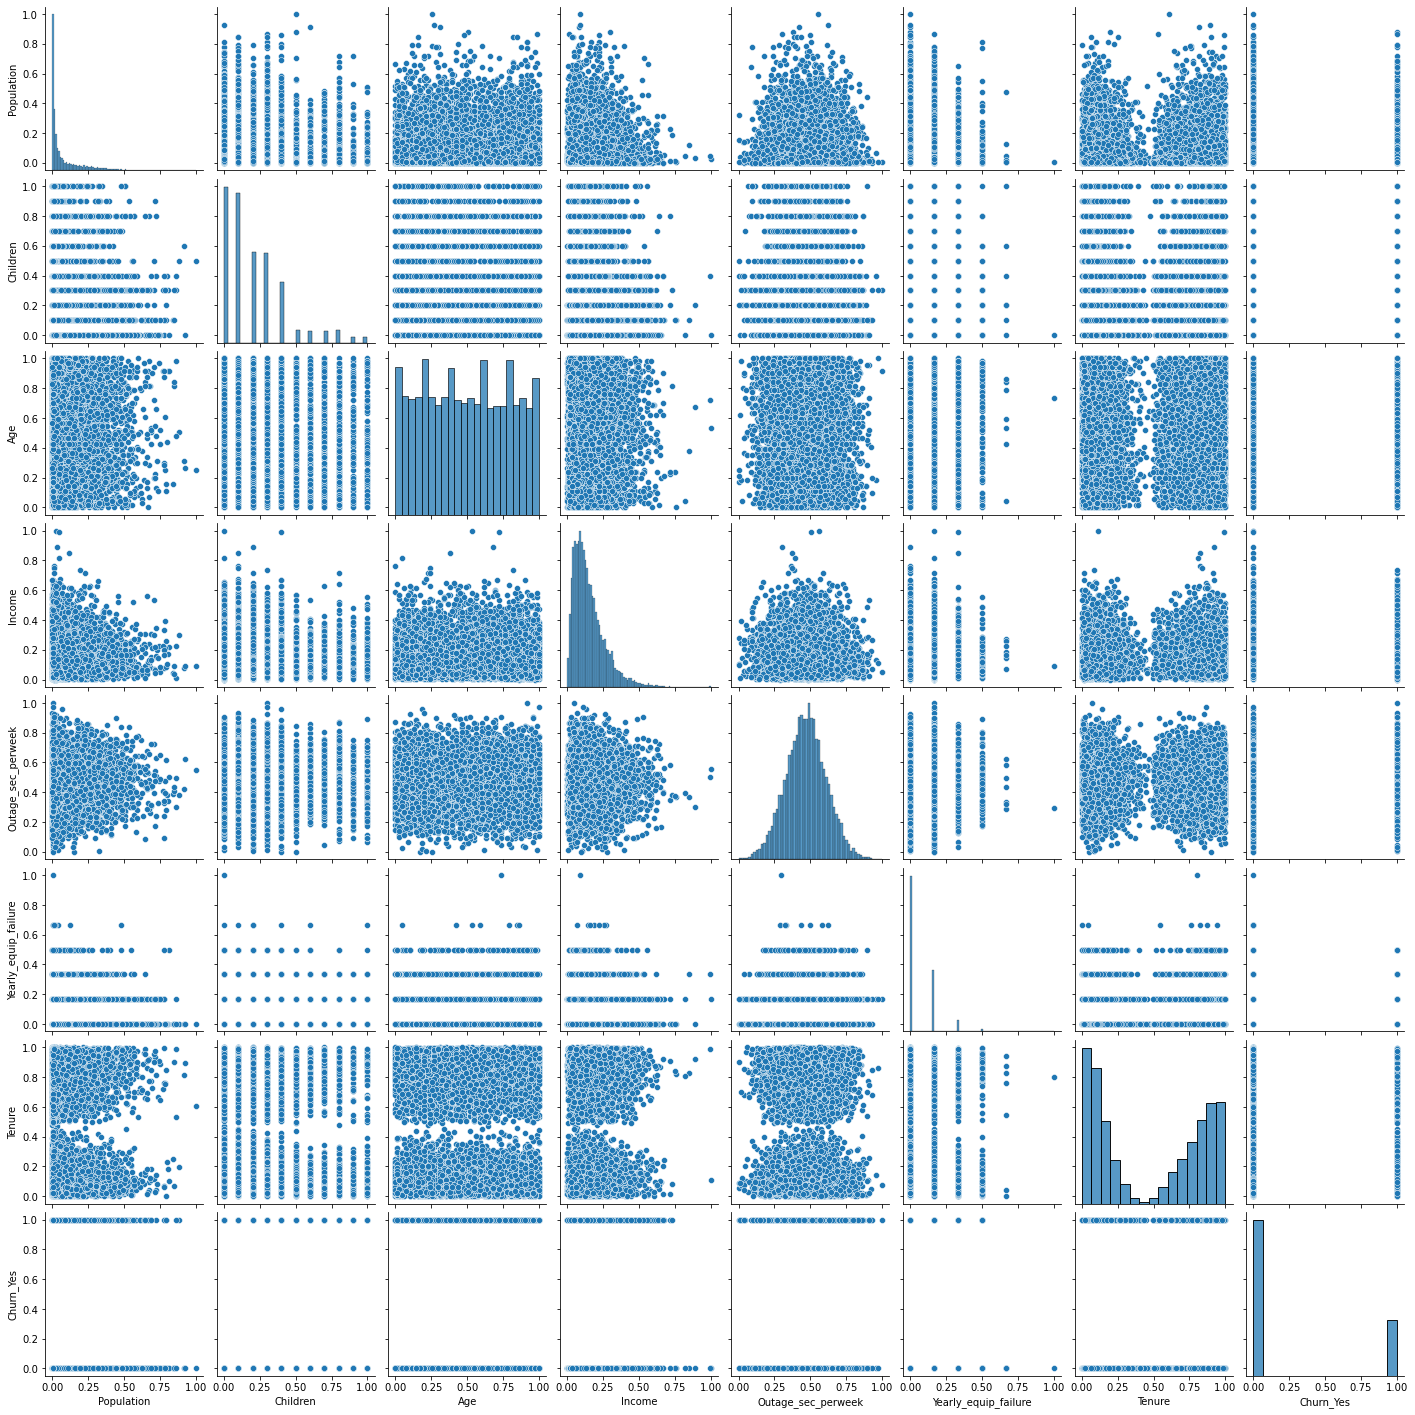

In [9]:
sns.pairplot(df_scaled[['Population','Children','Age','Income','Outage_sec_perweek','Yearly_equip_failure','Tenure','Churn_Yes']])

Notes of interest:<br>
- Age does appear to be an even distribution
- Outage has a normal distribution
- No clear cut areas of correlation in the variables observed

### 3.  Provide the code used to perform the classification analysis.
 


In [10]:
# Load necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN

# Create the KNN object and a parameter grid to explore
knn = KNN()
param_grid = {'n_neighbors' : [3,6,9,12,15,18,21,24,27,30,33]}

# Create the Grid Search object - this will try all values in the parameter grid
# using CV different splits for cross validation
grid_dt = GridSearchCV(estimator=knn, param_grid=param_grid, 
                       scoring='accuracy', cv=10, n_jobs=-1)
# Fit the model
grid_dt.fit(X_train, y_train)

# Print results
print('Our best set of hyperparameters was: ', grid_dt.best_params_)
print('Our best AUC on training data was:   ', grid_dt.best_score_)

Our best set of hyperparameters was:  {'n_neighbors': 21}
Our best AUC on training data was:    0.844375


Text(0.5, 257.44, 'Predicted label')

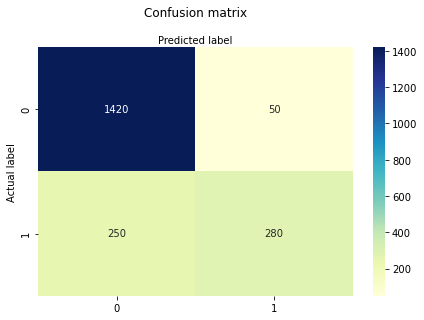

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc

# Get the best model and predict with it
best_dt = grid_dt.best_estimator_
y_pred = best_dt.predict(X_test)

# Build a confusion matrix by comparing actuals with predictions (in our test set)
con_matrix = confusion_matrix(y_test, y_pred)

# Build a plot for the confusion matrix 
class_names = [0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Fill it with a heatmap to visualize the confusion matrix
sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
# Display the final results using unseen data (the test set)
print('Accuracy:         ', acc(y_test, y_pred))
print('Area Under Curve: ', auc(y_test, y_pred))

Accuracy:          0.85
Area Under Curve:  0.7471441406751379


---

## Part V: Data Summary and Implications


### 1.  Explain the accuracy and the area under the curve (AUC) of your classification model.

**The Accuracy of our model is 0.85.**
This value is calculated by dividing the true positives by the total number of positives, both true and false.  This value means that our model should accurately predict a customer likely to churn 85% of the time.

**The AUC for our model is 0.747.**
This is the area under the ROC showing where our predictions would be valid.  The AUC score can range from 0 to 1 and it measures the quality of our predictions.  A score of 0 would be incorrect all the time, while a score of 1 would be a perfect model.  (Classification: ROC Curve and AUC | Machine Learning Crash Course, n.d.)

### 2.  Discuss the results and implications of your classification analysis.

Based on our Accurany and AUC scores, we can do well while trying to predict customers that might churn.  Although there are limitations to our analysis (see the next section), we do have a well performing model and should be able to predict most of the customers that should receive extra focus.

### 3.  Discuss one limitation of your data analysis.

There are a few limitations of K Nearest Neighbors analysis.  One is the computation and memory requirements.  Because it stores almost all of the training data, KNN is process intensive and will require a lot of memory to run as the model grows (Bronshtein, 2019).  KNN is also subject to irrelevant data, and the weights based on distance.  



### 4.  Recommend a course of action for the real-world organizational situation based on your results and implications discussed.

Because of the limitations of KNN, I would suggest the following:
 - Implement multiple models using other classifiers to test for a better performing classifier that uses less resources
 - Go into deeper feature analysis, trimming down the feature set or weighting them appropriately
 - Based on the deeper model and feature analysis, pick a model that is the best fit of performance vs cost based on the companies needs
 


---

## Part VI: Sources

### Theory

Harrison, O. (2019, July 14). Machine Learning Basics with the K-Nearest Neighbors Algorithm. Medium. https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761#:%7E:text=The%20KNN%20algorithm%20assumes%20that,of%20a%20feather%20flock%20together.%E2%80%9D&text=Notice%20in%20the%20image%20above,are%20close%20to%20each%20other.### 4.  Recommend a course of action for the real-world organizational situation based on your results and implications discussed.

Bhattacharyya, M. (2020, July 15). 3 Things You Need To Know Before You Train-Test Split. Medium. https://towardsdatascience.com/3-things-you-need-to-know-before-you-train-test-split-869dfabb7e50

Bronshtein, A. (2019, May 6). A Quick Introduction to K-Nearest Neighbors Algorithm. Medium. https://blog.usejournal.com/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7

Classification: ROC Curve and AUC | Machine Learning Crash Course. (n.d.). Google Developers. Retrieved April 5, 2021, from https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:%7E:text=AUC%20stands%20for%20%22Area%20under,across%20all%20possible%20classification%20thresholds.


### Code

ipython notebook pandas max allowable columns. (2014, November 27). Stack Overflow. https://stackoverflow.com/questions/27163830/ipython-notebook-pandas-max-allowable-columns

Dorpe, S. (2018, December 13). Preprocessing with sklearn: a complete and comprehensive guide. Medium. https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

pandas.get_dummies — pandas 1.2.3 documentation. (n.d.). Pandas Documentation. Retrieved April 5, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

Brownlee, J. (2020, August 28). How to Use StandardScaler and MinMaxScaler Transforms in Python. Machine Learning Mastery. https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/